<a href="https://colab.research.google.com/github/gdebasish11/PySpark_ML/blob/main/Telecos_Customer_Churn_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 41 kB/s 
     |████████████████████████████████| 199 kB 48.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=782165619a403aec54724dc4a44bd4aec139471866f261cdc635cc0240035aaa
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[2]")\
        .appName('PySpark_Customer_Churn')\
        .getOrCreate()

In [ ]:
##Craete sparkcontext from spark session
sc=spark.sparkContext

In [ ]:
file_location='/content/drive/MyDrive/Customer_Churn_Telecos.csv'
file_type='csv'

## csv options
infer_schema='true'
first_row_is_header='true'
delimiter=','

df=spark.read.format(file_type)\
      .option("inferSchema",infer_schema)\
      .option("header",first_row_is_header)\
      .option("sep",delimiter)\
      .option("nanValue",' ')\
      .option("nullValue",' ')\
      .load(file_location)


In [ ]:
df.show((4))

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|    

In [ ]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)



In [ ]:
from pyspark.sql.functions import when,col,isnan,count

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|         0|     0|            0|      0|         0|     0|           0|            0|              0|             0|           0|               0|          0|          0|              0|       0|               0| 

In [ ]:
df.createOrReplaceTempView("churn_analysis")

sqlDf=spark.sql("Select * from churn_analysis where TotalCharges> 100.0")
sqlDf.show(3)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|5575-GNVDE|  Male|            0|     No|        No|    34|         Yes|              No|            DSL|           Yes|          No|             Yes|         No|    

In [ ]:
df.groupby('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|   No| 5174|
|  Yes| 1869|
+-----+-----+



In [ ]:
df.select(['tenure','MonthlyCharges','TotalCharges']).describe().show()

+-------+------------------+------------------+------------------+
|summary|            tenure|    MonthlyCharges|      TotalCharges|
+-------+------------------+------------------+------------------+
|  count|              7043|              7043|              7032|
|   mean| 32.37114865824223| 64.76169246059922|2283.3004408418697|
| stddev|24.559481023094442|30.090047097678482| 2266.771361883145|
|    min|                 0|             18.25|              18.8|
|    max|                72|            118.75|            8684.8|
+-------+------------------+------------------+------------------+



In [ ]:
df.show(3)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+----------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|   PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+----------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|         No|    

##EDA

In [ ]:
## Bivariate analysis of churn against gender
sqlGenderChurn=spark.sql("Select gender,Churn, count(*) from churn_analysis group by gender,Churn")
sqlGenderChurn.show()

+------+-----+--------+
|gender|Churn|count(1)|
+------+-----+--------+
|  Male|   No|    2625|
|  Male|  Yes|     930|
|Female|   No|    2549|
|Female|  Yes|     939|
+------+-----+--------+



In [ ]:
## Bivariate analysis of churn against SeniorCitizen
sqlSeniorCitizenChurn=spark.sql("Select SeniorCitizen,Churn, count(*) from churn_analysis group by SeniorCitizen,Churn")
sqlSeniorCitizenChurn.show()

+-------------+-----+--------+
|SeniorCitizen|Churn|count(1)|
+-------------+-----+--------+
|            1|   No|     666|
|            0|   No|    4508|
|            0|  Yes|    1393|
|            1|  Yes|     476|
+-------------+-----+--------+



In [ ]:
## Bivariate analysis of churn against Dependents
sqlDependentsChurn=spark.sql("Select Dependents,Churn, count(*) from churn_analysis group by Dependents,Churn")
sqlDependentsChurn.show()

+----------+-----+--------+
|Dependents|Churn|count(1)|
+----------+-----+--------+
|       Yes|  Yes|     326|
|        No|   No|    3390|
|       Yes|   No|    1784|
|        No|  Yes|    1543|
+----------+-----+--------+



In [ ]:
df.show(3)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+----------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|   PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+----------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|         No|    

In [ ]:
## Bivariate analysis of churn against tenure
sqltenureChurn=spark.sql("Select tenure,Churn, count(*) as count from churn_analysis group by tenure,Churn order by tenure")
sqltenureChurn.show()

+------+-----+-----+
|tenure|Churn|count|
+------+-----+-----+
|     0|   No|   11|
|     1|  Yes|  380|
|     1|   No|  233|
|     2|   No|  115|
|     2|  Yes|  123|
|     3|   No|  106|
|     3|  Yes|   94|
|     4|  Yes|   83|
|     4|   No|   93|
|     5|   No|   69|
|     5|  Yes|   64|
|     6|   No|   70|
|     6|  Yes|   40|
|     7|   No|   80|
|     7|  Yes|   51|
|     8|   No|   81|
|     8|  Yes|   42|
|     9|  Yes|   46|
|     9|   No|   73|
|    10|   No|   71|
+------+-----+-----+
only showing top 20 rows



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pandas_df = sqltenureChurn.toPandas()
pandas_df.head()

,tenure,Churn,count
0,0,No,11
1,1,No,233
2,1,Yes,380
3,2,No,115
4,2,Yes,123


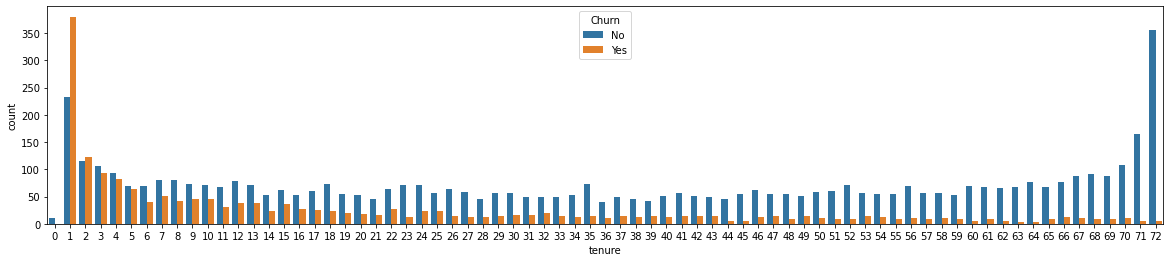

In [ ]:
plt.figure(figsize=(20, 4))

sns.barplot(x = 'tenure',
            y = 'count',
            hue = 'Churn',
            data = pandas_df)

plt.show()

##we can see as the tenure increases less people churns

In [ ]:
## Bivariate analysis of churn against PaymentMethod
sqlPaymentMethodChurn=spark.sql("Select PaymentMethod,Churn, count(*) as count from churn_analysis group by PaymentMethod,Churn")
sqlPaymentMethodChurn.show()

+--------------------+-----+-----+
|       PaymentMethod|Churn|count|
+--------------------+-----+-----+
|Credit card (auto...|   No| 1290|
|Bank transfer (au...|   No| 1286|
|        Mailed check|  Yes|  308|
|Credit card (auto...|  Yes|  232|
|    Electronic check|   No| 1294|
|    Electronic check|  Yes| 1071|
|Bank transfer (au...|  Yes|  258|
|        Mailed check|   No| 1304|
+--------------------+-----+-----+



In [ ]:
pandas_df_paymentmethod = sqlPaymentMethodChurn.toPandas()
pandas_df_paymentmethod.head()

,PaymentMethod,Churn,count
0,Credit card (automatic),No,1290
1,Bank transfer (automatic),No,1286
2,Mailed check,Yes,308
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294


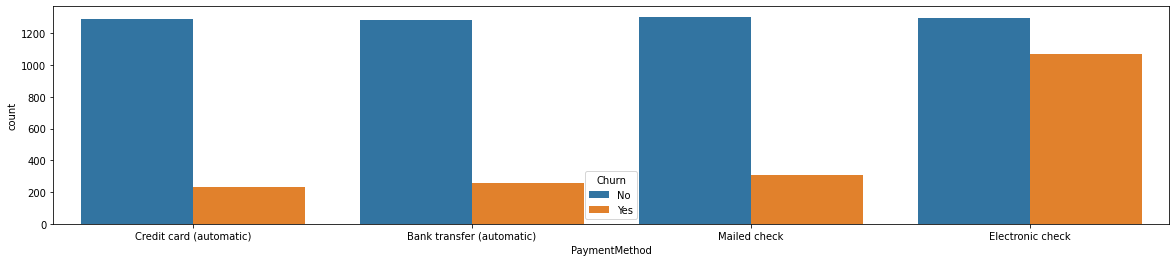

In [ ]:
plt.figure(figsize=(20, 4))

sns.barplot(x = 'PaymentMethod',
            y = 'count',
            hue = 'Churn',
            data = pandas_df_paymentmethod)

plt.show()

##we can see electronic check has lot of churn

In [ ]:
df.show(2)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+----------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|   PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+----------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|         No|    

In [ ]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)



## Feature Engineering

In [ ]:
#import module
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer,OneHotEncoder,VectorAssembler

In [ ]:
cat_columns=["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity",
             "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling",
             "PaymentMethod"]

In [ ]:
stages=[]

for col in cat_columns:
  stringindexer=StringIndexer(inputCol=col,outputCol=col+"_Index")
  onehotencoder=OneHotEncoder(inputCols=[stringindexer.getOutputCol()],outputCols=[col+"_catVec"])

  stages+=[stringindexer,onehotencoder]

In [ ]:
stages

In [ ]:
from pyspark.ml.feature import Imputer

imputer=Imputer(inputCols=["TotalCharges"],outputCols=["Output_TotalCharges"])
##labelindex the churn column
lblIndex=StringIndexer(inputCols=["Churn"],outputCols=["label"])
stages+=[imputer,lblIndex]

In [ ]:
## create vector assembler

numerical_cols=["tenure","Output_TotalCharges","MonthlyCharges"]
all_cols=[col+"_catVec" for col in cat_columns]+numerical_cols
assembler=VectorAssembler(inputCols=all_cols,outputCol="features")

stages+=[assembler]


In [ ]:
## train test split
churn_df=df
(train_data,test_data)=churn_df.randomSplit([0.7,0.3],22)

In [ ]:
pipeline=Pipeline(stages=stages)

#df_r=pipeline.fit(df).transform(df)
pipelineModel=pipeline.fit(train_data)
#df_r.show(5)

In [ ]:
traindf_prep=pipelineModel.transform(train_data)
testdf_prep=pipelineModel.transform(test_data)

In [ ]:
traindf_prep.show(1)

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+------------+-------------+-------------------+--------------------+-------------+--------------+----------------+-----------------+------------------+-------------------+-------------------+--------------------+---------------------+----------------------+--------------------+---------------------+------------------+-------------------+----------------------+-----------------------+-----------------+------------------+-----------------+------------------+---------------------+----------------------+--------------+---------------+----------------------+-----------------------+-------------------+--------------------+-------------------+-----+--------------------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneSer

##Modelling

In [ ]:
from pyspark.ml.classification import LogisticRegression

lrmodel=LogisticRegression(featuresCol='features',labelCol='label',maxIter=15)
lrmodel.fit(traindf_prep)

LogisticRegressionModel: uid=LogisticRegression_8f4211e1c759, numClasses=2, numFeatures=30

In [ ]:
summary=lrmodel.summary

print('Accuracy:'+summary.Accuracy)

AttributeError: ignored

In [ ]:
predictions=lrmodel.predict(testdf_prep)
predictions.select('label','features','rawPrediction','prediction','probability')

AttributeError: ignored